# Test Polynomial Regression Model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
day_df = pd.read_csv('day_averaged.csv')

## Removing Seasonality from Data

This has been done by referencing each data point to the number of days from the first of January (1/1/20xx) for the year collected. 

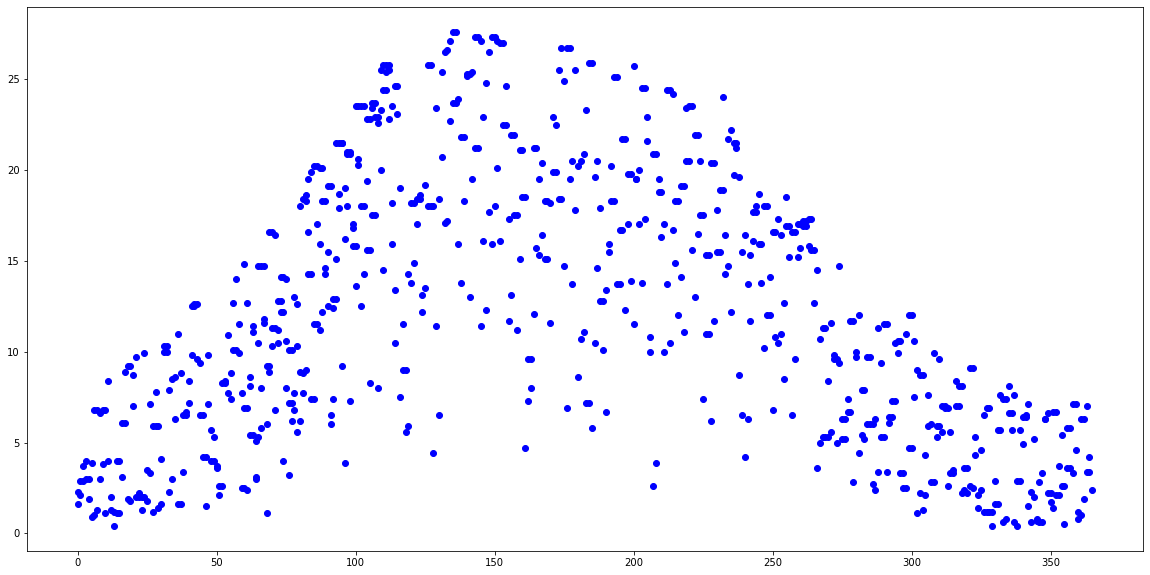

In [3]:
day_df = day_df.sort_values(by=['Day'], ignore_index=True)

plt.figure(figsize=(20,10))
plt.scatter(day_df['Day'], day_df['total_solar'], marker='o',color = 'blue')

In [4]:
# Implement Test-Train Split 

inputs  = day_df[['Day', 'temp_mean', 'pressure_mean', 'humidity_mean', 'wind_speed_mean', 'wind_deg_mean', 'clouds_all_mean']].to_numpy()
output = day_df[['total_solar']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.25, random_state=42)

## Implementing polynomial regression and determining the most suitable order of polynomial to be used

Polynomial regressions are simple to implement and can provide an accurate result providing the right order of polynomial is used. Below a range from first order to sixth order polynomials are trained then tested for accuracy.

In [5]:
poly_order = np.arange(1,5)

r_sq_train = []
r_sq_test = []

for poly in poly_order:

    #print(poly)
    X_train_poly = PolynomialFeatures(degree=poly, include_bias=False).fit_transform(X_train)
    X_test_poly = PolynomialFeatures(degree=poly, include_bias=False).fit_transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    # r_sq_train[poly] = model.score(X_train_poly, y_train)
    # r_sq_test[poly] = model.score(X_test_poly, y_test)

    r_sq_train.append(model.score(X_train_poly, y_train))
    r_sq_test.append(model.score(X_test_poly, y_test))

Text(0, 0.5, 'score')

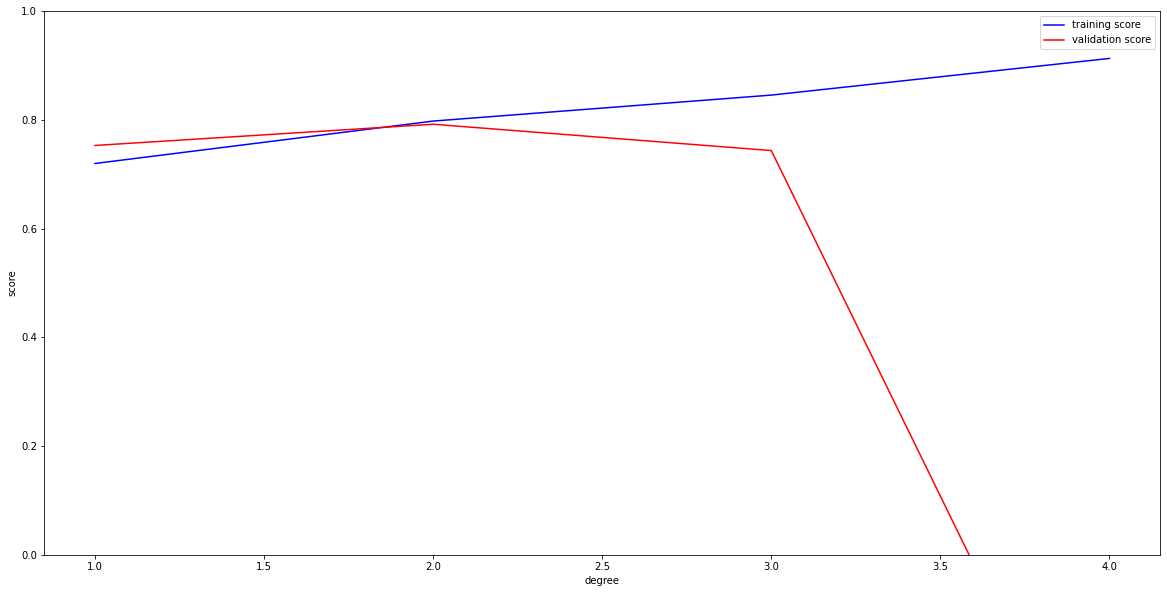

In [6]:
plt.figure(figsize=(20,10))
plt.plot(poly_order, r_sq_train, color='blue', label='training score')
plt.plot(poly_order, r_sq_test, color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

In [7]:
# Implement polynomial regression 

poly_order = r_sq_test.index(max(r_sq_test)) + 1

X_train_poly = PolynomialFeatures(degree=poly_order, include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=poly_order, include_bias=False).fit_transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

r_sq = model.score(X_test_poly, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R Squared = ',r_sq)
print('RMSE = ', rmse)

R Squared =  0.792043559507045
RMSE =  3.3387857338387783


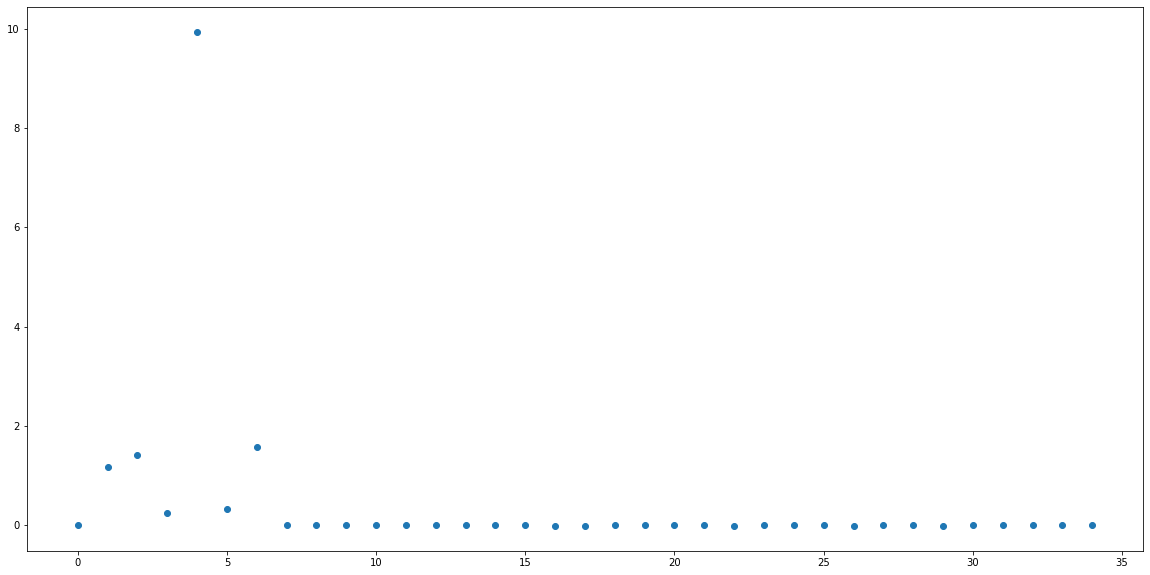

In [8]:
# Retrieve the regression coefficients
fit_coef = model.coef_

plt.figure(figsize=(20,10))
plt.scatter(range(0,len(fit_coef[0])),fit_coef)

(0.0, 365.0)

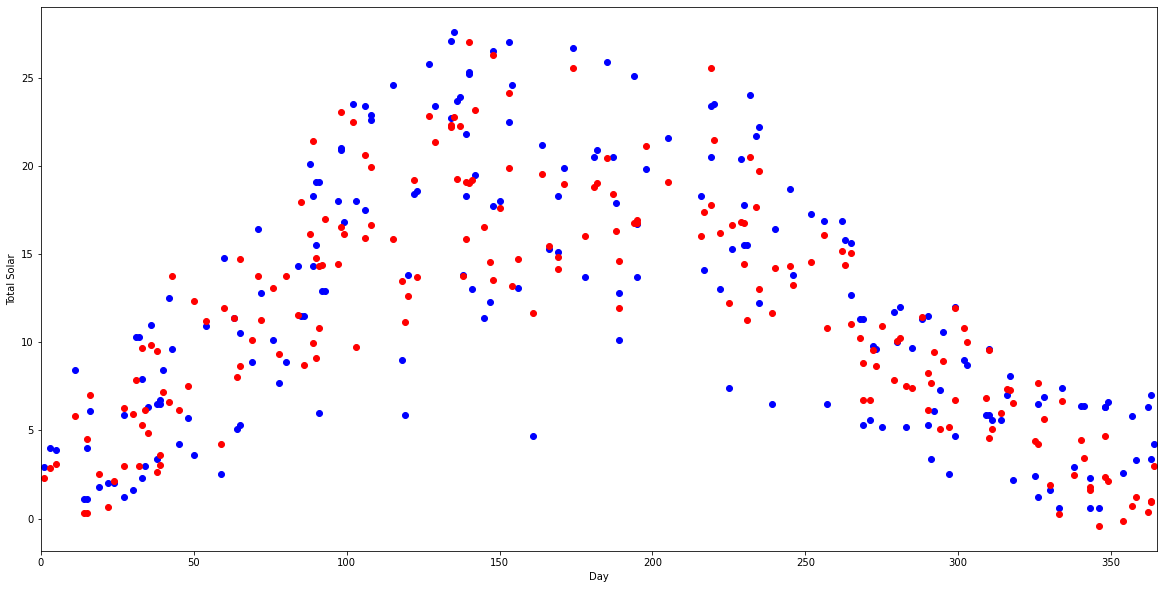

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(X_test[:, 0], y_test, marker='o',color = 'blue')
plt.scatter(X_test[:, 0], y_pred, marker='o',color = 'red')
plt.xlabel('Day')
plt.ylabel('Total Solar')
plt.xlim([0, 365])

(0.0, 365.0)

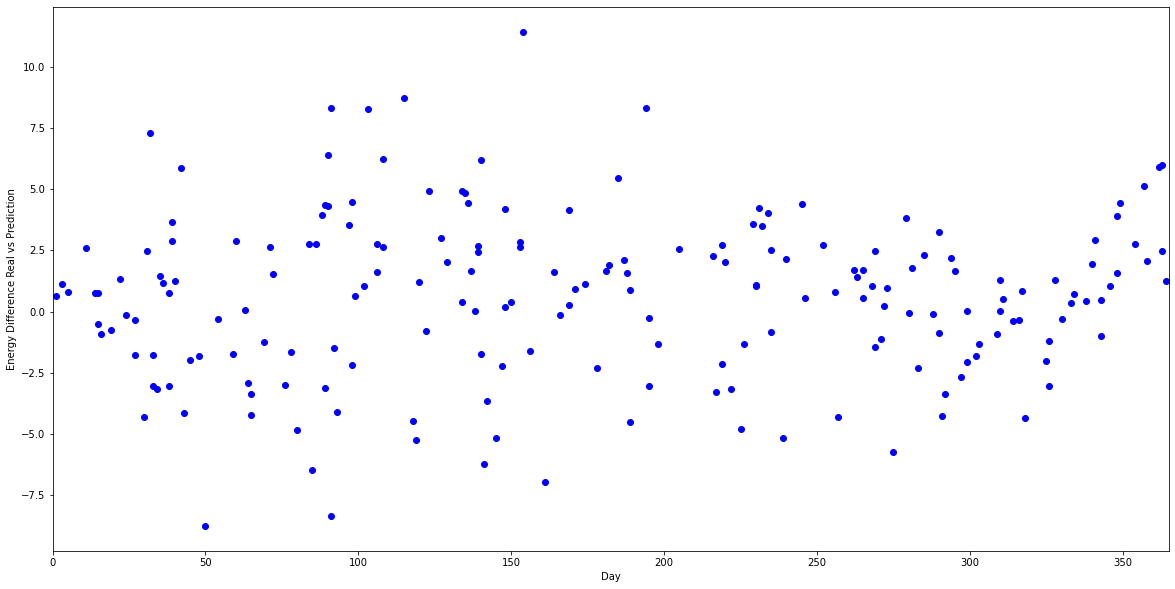

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(X_test[:, 0], y_test - y_pred, marker='o',color = 'blue')
plt.xlabel('Day')
plt.ylabel('Energy Difference Real vs Prediction')
plt.xlim([0, 365])

## Evaluation of Regression Model 

From this it is clear that there can be significant differences between the predicted energy difference and real value. This suggests that the model isn't particularly accurate for this application and other methods maybe more suitable.